# BEGINNER'S Guide to Various Data Visualization Techniques

These plots are studied-
* Bar plot
* Pie chart
* Stacked Area plot
* Line chart
* Histogram
* Scatter plot
* Regression plot
* Area and Line plot

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eda-datsets/bar_line_chart_data.csv
/kaggle/input/eda-datsets/scatter_data.csv
/kaggle/input/eda-datsets/scatter_plot_ii.csv
/kaggle/input/eda-datsets/bar_chart_data.csv
/kaggle/input/eda-datsets/line_chart_data.csv
/kaggle/input/eda-datsets/histogram_data.csv
/kaggle/input/eda-datsets/pie_chart_data.csv
/kaggle/input/eda-datsets/stacked_area_chart_data.csv


In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Bar Chart

A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. 
The bar plots can be plotted horizontally or vertically. 
A bar chart describes the comparisons between the discrete categories. 

One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.

In [4]:
Data= pd.read_csv("/kaggle/input/eda-datsets/bar_chart_data.csv")

In [5]:
Data

,Brand,Cars Listings
0,Audi,419
1,BMW,636
2,Mercedes-Benz,820
3,Mitsubishi,306
4,Renault,438
5,Toyota,509
6,Volkswagen,875


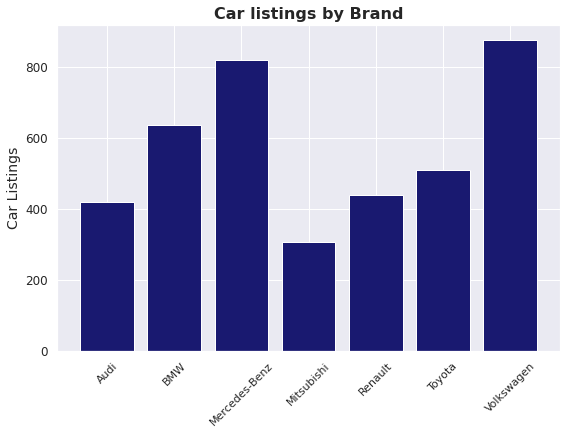

In [6]:
plt.figure(figsize=(9,6))
plt.bar(x=Data["Brand"],height=Data["Cars Listings"],color="midnightblue")
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.title("Car listings by Brand",fontsize=16,fontweight='bold')
plt.ylabel("Car Listings", fontsize=14)
plt.show()

# Pie Chart

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data. 

In [7]:
pie_data=pd.read_csv("/kaggle/input/eda-datsets/pie_chart_data.csv")

In [8]:
pie_data

,Engine Fuel Type,Number of Cars
0,Diesel,2019
1,Gas,613
2,Other,154
3,Petrol,1559


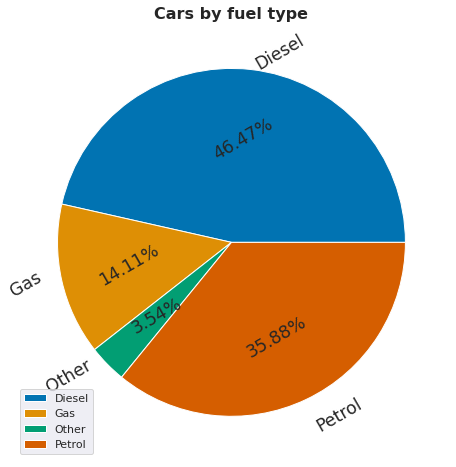

In [9]:
sns.set_palette('colorblind')
plt.figure(figsize=(10,8))
plt.pie(pie_data["Number of Cars"],
   labels=pie_data["Engine Fuel Type"],
    autopct='%.2f%%',
    textprops={"size": "x-large",
              "rotation": "30"})
plt.legend()
plt.title("Cars by fuel type", fontsize="16",fontweight="bold")
plt.show()

# Stacked Bar Chart

Stacked bar plots represent different groups on the highest of 1 another. The peak of the bar depends on the resulting height of the mixture of the results of the groups. It goes from rock bottom to the worth rather than going from zero to value.

In [10]:
stack_data=pd.read_csv("/kaggle/input/eda-datsets/stacked_area_chart_data.csv")

In [11]:
stack_data.head()

,Year,Gas,Petrol,Diesel,Other
0,1982,0,94,0,0
1,1983,0,347,0,0
2,1984,300,0,334,0
3,1985,1030,1184,984,0
4,1986,511,681,1066,340


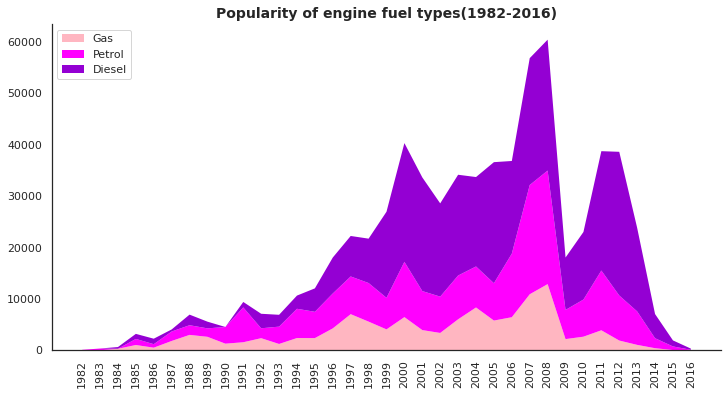

In [12]:
plt.figure(figsize=(12,6))
sns.set_style("white")
labels=["Gas","Petrol","Diesel"]
plt.stackplot(stack_data["Year"],
              stack_data["Gas"],
              stack_data["Petrol"],
              stack_data["Diesel"],
              edgecolor='none',
              colors=["#FFB6C1","FF00FF","#9400D3"])
plt.xticks(stack_data["Year"], rotation=90)
plt.title("Popularity of engine fuel types(1982-2016)", fontsize=14, weight="bold")
plt.legend(labels=labels, loc='upper left')
sns.despine()
plt.show()

# Line Chart

 Line charts are used to represent the relation between two data X and Y on a different axis.

In [13]:
line_chart=pd.read_csv("/kaggle/input/eda-datsets/line_chart_data.csv")

In [14]:
line_chart

,Date,GSPC500,FTSE100
0,1/3/2000,0.003264,0.000000
1,1/4/2000,-0.009549,0.000000
2,1/5/2000,-0.038345,-0.038137
3,1/6/2000,0.001922,-0.019502
4,1/7/2000,0.000956,-0.013571
...,...,...,...
2865,12/27/2010,-0.002282,0.002135
2866,12/28/2010,0.003539,0.000000
2867,12/29/2010,-0.000254,0.000000
2868,12/30/2010,0.000524,-0.002080


In [15]:
line_chart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2870 non-null   object 
 1   GSPC500  2870 non-null   float64
 2   FTSE100  2870 non-null   float64
dtypes: float64(2), object(1)
memory usage: 67.4+ KB


First convert the object Date column into datetime.

In [16]:
line_chart["date"]=pd.to_datetime(line_chart["Date"])

In [17]:
line_chart["date"]

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
2865   2010-12-27
2866   2010-12-28
2867   2010-12-29
2868   2010-12-30
2869   2010-12-31
Name: date, Length: 2870, dtype: datetime64[ns]

By using whole data-

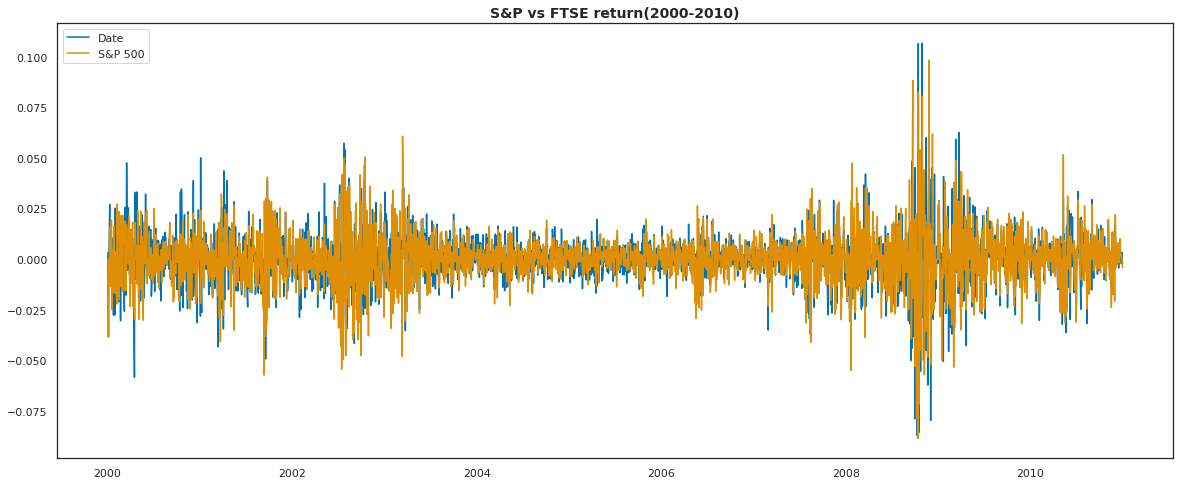

In [18]:
plt.figure(figsize=(20,8))
plt.plot(line_chart["date"],line_chart["GSPC500"])
plt.plot(line_chart["date"],line_chart["FTSE100"])
plt.title("S&P vs FTSE return(2000-2010)",fontsize=14,weight="bold")
plt.legend(labels=["Date","S&P 500","FTSE 100"], loc="upper left")
plt.show()

We can't analyse much from this line chart,so now what?

Try it out for sample data.

In [19]:
df_2009= line_chart[(line_chart.date>="2009-07-01") & (line_chart.date<="2009-12-31")]

In [20]:
df_2009

,Date,GSPC500,FTSE100,date
2477,7/1/2009,-0.006827,-0.010433,2009-07-01
2478,7/2/2009,0.000456,0.021533,2009-07-02
2479,7/3/2009,0.000000,-0.024512,2009-07-03
2480,7/6/2009,-0.029276,0.000472,2009-07-06
2481,7/7/2009,0.004842,-0.009773,2009-07-07
...,...,...,...,...
2604,12/25/2009,0.000000,0.000000,2009-12-25
2605,12/28/2009,0.005753,0.000000,2009-12-28
2606,12/29/2009,0.000905,0.000000,2009-12-29
2607,12/30/2009,-0.002676,0.006516,2009-12-30


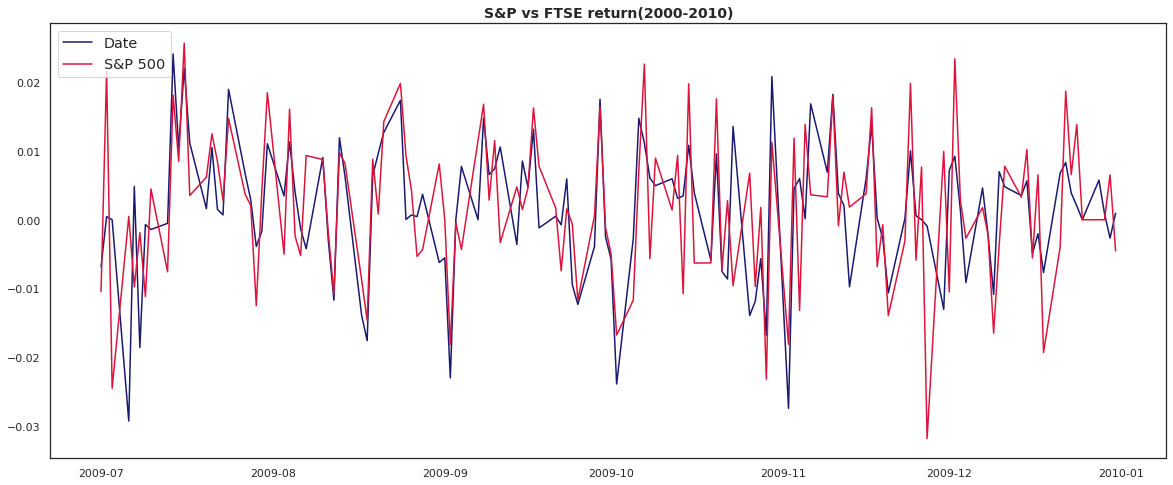

In [21]:
plt.figure(figsize=(20,8))
plt.plot(df_2009["date"],df_2009["GSPC500"],color="midnightblue")
plt.plot(df_2009["date"],df_2009["FTSE100"],color="crimson")
plt.title("S&P vs FTSE return(2000-2010)",fontsize=14,weight="bold")
plt.legend(labels=["Date","S&P 500","FTSE 100"], loc="upper left",fontsize="large")
plt.show()

Hurray! we are now able to see the chart properly and can analyse it further.

# Histogram

A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

In [22]:
hist_data=pd.read_csv("/kaggle/input/eda-datsets/histogram_data.csv")

In [23]:
hist_data

,ID,Building Type,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price
0,1030,1,2005.0,11.0,Apartment,30,743.09,246
1,1029,1,2005.0,10.0,Apartment,29,756.21,246
2,2002,2,2007.0,7.0,Apartment,2,587.28,209
3,2031,2,2007.0,12.0,Apartment,31,1604.75,453
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467
...,...,...,...,...,...,...,...,...
262,5044,5,NaN,NaN,Apartment,44,1238.58,323
263,5047,5,NaN,NaN,Apartment,47,794.52,279
264,5048,5,NaN,NaN,Apartment,48,1013.27,288
265,5050,5,NaN,NaN,Apartment,50,1074.71,366


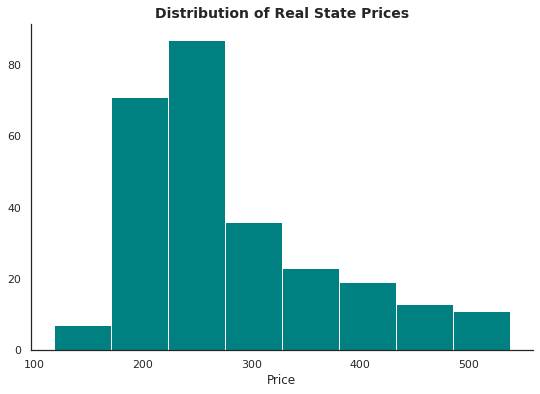

In [24]:
plt.figure(figsize=(9,6))
sns.set_style("white")
plt.hist(hist_data["Price"], bins=8, color="#008080")
plt.title("Distribution of Real State Prices", fontsize=14, weight="bold")
plt.xlabel("Price")
sns.despine()
plt.show()

# Scatter Plot

Scatter plots are used to observe relationship between variables and uses dots to represent the relationship between them. Scatter plots are widely used to represent relation among variables and how change in one affects the other.

In [25]:
scatter_data= pd.read_csv("/kaggle/input/eda-datsets/scatter_data.csv")

In [26]:
scatter_data

,ID,Building Type,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1030,1,2005.0,11.0,Apartment,30,743.09,246.17268,Sold
1,1029,1,2005.0,10.0,Apartment,29,756.21,246.33190,Sold
2,2002,2,2007.0,7.0,Apartment,2,587.28,209.28091,Sold
3,2031,2,2007.0,12.0,Apartment,31,1604.75,452.66701,Sold
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467.08331,Sold
...,...,...,...,...,...,...,...,...,...
262,5044,5,NaN,NaN,Apartment,44,1238.58,322.61074,Not Sold
263,5047,5,NaN,NaN,Apartment,47,794.52,279.19126,Not Sold
264,5048,5,NaN,NaN,Apartment,48,1013.27,287.99653,Not Sold
265,5050,5,NaN,NaN,Apartment,50,1074.71,365.86878,Not Sold


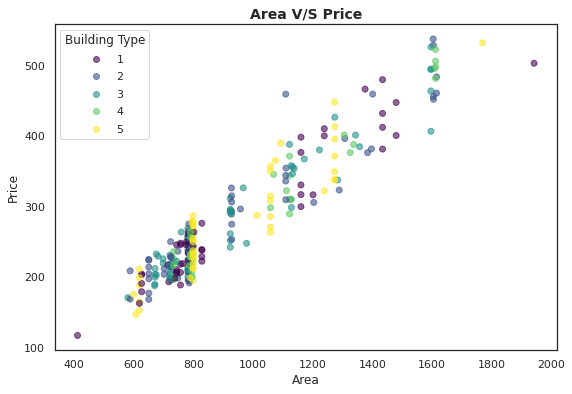

In [27]:
plt.figure(figsize=(9,6))
scatter=plt.scatter(scatter_data["Area (ft.)"],
            scatter_data["Price"],
           alpha=0.6,
           c=scatter_data["Building Type"],
           cmap='viridis')
plt.title("Area V/S Price", fontsize=14, weight="bold")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend(*scatter.legend_elements(), loc="upper left", title="Building Type")
plt.show()

# Regression Plot

 Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.
 
 We can plot regression plots using two methods-
 1. sns.regplot()
 2. sns.lmplot()
 
Let's see both of these in details.

In [28]:
regression_data=pd.read_csv("/kaggle/input/eda-datsets/scatter_plot_ii.csv")

In [29]:
regression_data.head()

,Budget,Sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


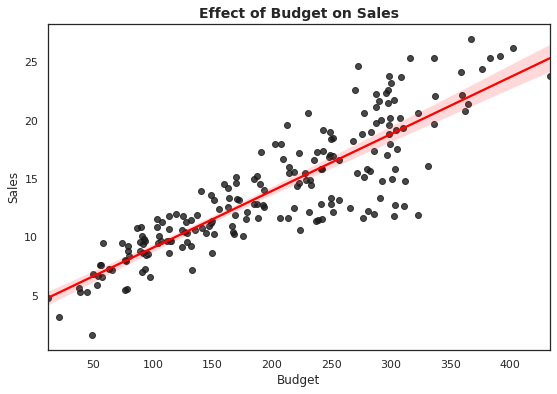

In [30]:
plt.figure(figsize=(9,6))
sns.regplot(x="Budget",
            y="Sales",
            data= regression_data,
            scatter_kws={'color':'k'},
            line_kws={'color':'red'})
plt.title("Effect of Budget on Sales", fontsize=14, weight="bold")
plt.show()

In [31]:
regression_data_2= pd.read_csv("/kaggle/input/eda-datsets/scatter_data.csv")

In [32]:
regression_data_2

,ID,Building Type,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1030,1,2005.0,11.0,Apartment,30,743.09,246.17268,Sold
1,1029,1,2005.0,10.0,Apartment,29,756.21,246.33190,Sold
2,2002,2,2007.0,7.0,Apartment,2,587.28,209.28091,Sold
3,2031,2,2007.0,12.0,Apartment,31,1604.75,452.66701,Sold
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467.08331,Sold
...,...,...,...,...,...,...,...,...,...
262,5044,5,NaN,NaN,Apartment,44,1238.58,322.61074,Not Sold
263,5047,5,NaN,NaN,Apartment,47,794.52,279.19126,Not Sold
264,5048,5,NaN,NaN,Apartment,48,1013.27,287.99653,Not Sold
265,5050,5,NaN,NaN,Apartment,50,1074.71,365.86878,Not Sold


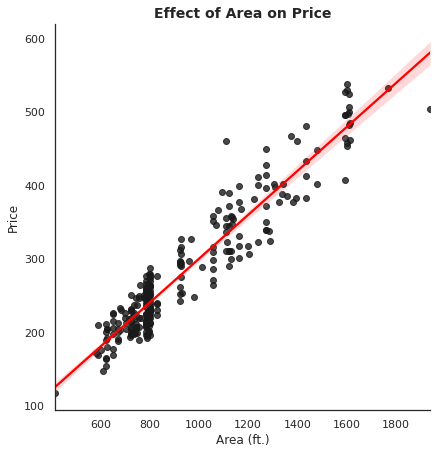

In [33]:
sns.lmplot(x="Area (ft.)",
          y="Price",
          data=regression_data_2,
          scatter_kws={'color':'k'},
          line_kws={'color':'red'},
          height=6)
sns.set()
plt.title("Effect of Area on Price", fontsize=14, weight="bold")
plt.show()

# Bar and Line Chart

It is basically the combination of bar plot and line chart.

In [34]:
combined_data= pd.read_csv("/kaggle/input/eda-datsets/bar_line_chart_data.csv")

In [35]:
combined_data.head()

,Year,Python Users,Participants
0,2012,0.149,798
1,2013,0.133,1880
2,2014,0.195,3285
3,2015,0.303,2800
4,2016,0.458,2895


In [36]:
from matplotlib.ticker import PercentFormatter

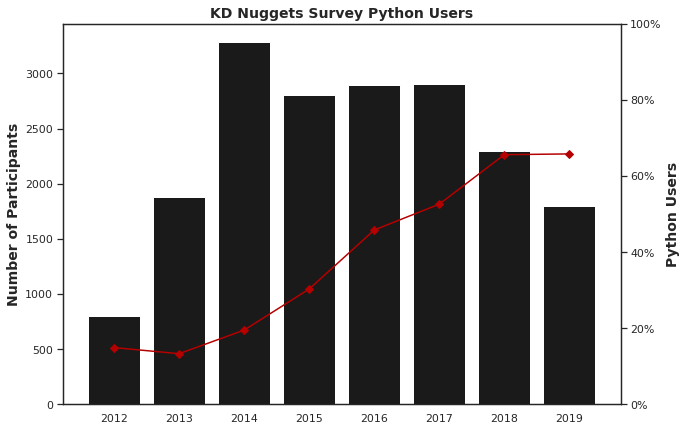

In [37]:
sns.set_style("white")
fig, ax= plt.subplots(figsize=(10,7))
ax.bar(combined_data["Year"],
      combined_data["Participants"],
      color='k')
ax.set_ylabel("Number of Participants", fontsize=14, weight="bold")
ax1= ax.twinx()
ax1.set_ylim(0,1)
ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
ax1.plot(combined_data["Year"],
      combined_data["Python Users"],
      color='#b60000',
      marker='D')
ax1.set_ylabel("Python Users", fontsize=14, weight="bold")
ax.set_title("KD Nuggets Survey Python Users", fontsize=14, weight="bold")
plt.show()

Happy Learning!

Hope you found it useful, if you get stuck, do comment!

Suggestions are always welcome!
Being a beginner,I will appreciate if you can give a read and review my notebook.Please upvote,if you like my work.It will boost my confidence.

Thank You.